In [43]:
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import sys
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Get the directory of the current script
try:
    # This will work if the script is being run as a file
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # Use the current working directory if __file__ is not defined
    current_dir = os.getcwd()
# Move up one directory level from EDA to the parent directory
parent_dir = os.path.dirname(current_dir)
# Construct the path to the xdrive folder
xdrive_path = os.path.join(parent_dir, 'xdrive')
# Add the xdrive path to sys.path
sys.path.append(xdrive_path)

featureeng_path = os.path.join(parent_dir, 'Feature Engineering')
# Add the xdrive path to sys.path
sys.path.append(featureeng_path)

# Construct the path to the xdrive folder
xdrive_path = os.path.join(parent_dir, 'Pipeline')
# Add the xdrive path to sys.path
sys.path.append(xdrive_path)
from build_a_pipeline import build_pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TimeDistributed, Dense
from build_a_pipeline import build_pipeline_P0_foward_price


In [44]:

model_performance = []
#x_train, x_val, X_test, y_train, y_val, y_test = build_pipeline_P0_foward_price(target_column = 'P1')
x_train, x_val, X_test, y_train, y_val, y_test = build_pipeline_P0_foward_price(target_column = 'P1',
                                                                                drop_features=False, 
                                                                                remove_outliers = True, 
                                                                                percentage_of_outliers=0.05, 
                                                                                train_size = 0.70, 
                                                                                val_size = 0.05, 
                                                                                deal_with_skewness = True) #drop_features = False
feature_names = x_train.columns
datetime_index = x_val.index
# Convert x_train and x_val to NumPy arrays
x_train = x_train.to_numpy()
x_val = x_val.to_numpy()
# Reshape x_train and x_val to have the required 3D shape
x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])  # [samples, time_steps=1, features]
x_val = x_val.reshape(x_val.shape[0], 1, x_val.shape[1])    



C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [45]:

# Build the LSTM model
multivariate_lstm = Sequential([
    LSTM(195, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    TimeDistributed(Dense(95, activation='selu')), 
    Flatten(),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best model based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the model
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the model (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")
model_performance.append({
    'Model': '1st Model',
    'LayerExtra': 'TimeDistributed, LSTM',
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse
})

Epoch 1/120


C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 15027.9053 - root_mean_squared_error: 121.9636 - val_loss: 1720.5791 - val_root_mean_squared_error: 41.4799
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5543.6167 - root_mean_squared_error: 73.6146 - val_loss: 1132.3665 - val_root_mean_squared_error: 33.6507
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3123.8347 - root_mean_squared_error: 55.1243 - val_loss: 1244.3911 - val_root_mean_squared_error: 35.2759
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2308.0413 - root_mean_squared_error: 47.4305 - val_loss: 1504.9329 - val_root_mean_squared_error: 38.7935
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1913.9504 - root_mean_squared_error: 43.2005 - val_loss: 1093.6146 - val_root_mean_squared_error: 33.0698
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1628.5460 - root_mean_squared_error: 39.9502 - val_loss: 1071.8870 - val_root_mean_squared_error: 32.7397
Epoch 7/120
18/18 ━

Improved version

## Trying the pipeline with no feature selection dropping

In [46]:
#x_train, x_val, X_test, y_train, y_val, y_test = build_pipeline_P0_foward_price(target_column = 'P1', drop_features = False)
x_train, x_val, X_test, y_train, y_val, y_test = build_pipeline_P0_foward_price(target_column = 'P1',
                                                                                drop_features=False, 
                                                                                remove_outliers = True, 
                                                                                percentage_of_outliers=0.05, 
                                                                                train_size = 0.70, 
                                                                                val_size = 0.05,
                                                                                deal_with_skewness = True) #drop_features = False


# Convert x_train and x_val to NumPy arrays
x_train = x_train.to_numpy()
x_val = x_val.to_numpy()
# Reshape x_train and x_val to have the required 3D shape
x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])  # [samples, time_steps=1, features]
x_val = x_val.reshape(x_val.shape[0], 1, x_val.shape[1])    

C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [47]:
import os
import random
import numpy as np
import tensorflow as tf

seed_value = 42
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

In [48]:
from tensorflow.keras.initializers import GlorotUniform
# Build the LSTM model
multivariate_lstm = Sequential([
    LSTM(195, input_shape=(x_train.shape[1], x_train.shape[2]), kernel_initializer=GlorotUniform(seed=42), return_sequences=True),
    TimeDistributed(Dense(95, activation='selu', kernel_initializer=GlorotUniform(seed=42))), 
    Flatten(),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best model based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True, clipnorm=1.0)
#optimizer = Adam(learning_rate=0.001, clipnorm=1.0)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the model
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the model (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")
model_performance.append({
    'Model': '1st Model',
    'LayerExtra': 'TimeDistributed, LSTM',
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse
})

C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 15115.2480 - root_mean_squared_error: 122.3447 - val_loss: 2009.2128 - val_root_mean_squared_error: 44.8242
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6259.6143 - root_mean_squared_error: 78.1525 - val_loss: 1245.4418 - val_root_mean_squared_error: 35.2908
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3230.3271 - root_mean_squared_error: 56.1030 - val_loss: 1069.9329 - val_root_mean_squared_error: 32.7098
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2528.4961 - root_mean_squared_error: 49.5837 - val_loss: 1168.7678 - val_root_mean_squared_error: 34.1872
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2015.6232 - root_mean_squared_error: 44.2411 - val_loss: 1173.5912 - val_root_mean_squared_error: 34.2577
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1652.2620 - root_mean_squared_error: 40.0791 - val_loss: 1053.6860 - val_root_mean_squared_error: 32.4605
Epoch 

In [49]:
from tensorflow.keras.models import load_model
best_model = load_model('multivariate_lstm.keras')
y_pred = best_model.predict(x_val)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


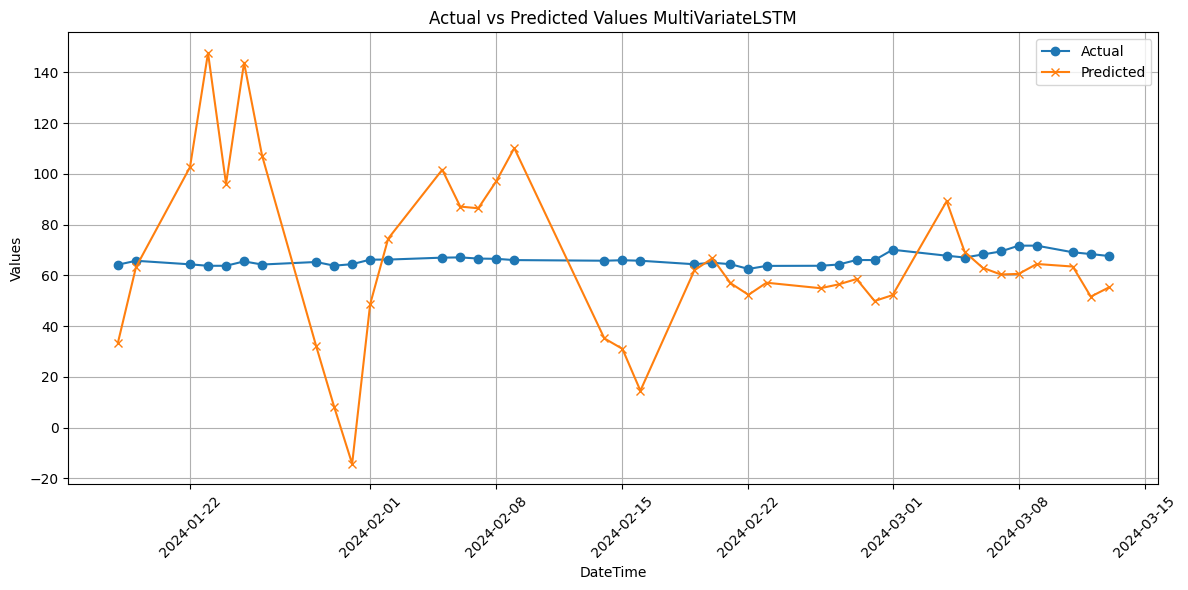

In [50]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

y_pred = y_pred.flatten()
predictions_df = pd.DataFrame(y_pred, index=datetime_index, columns=['Predicted'])
predictions_df = predictions_df.sort_index()
y_val = y_val.sort_index()

# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(y_val.index, y_val, label='Actual', marker='o')
plt.plot(y_val.index, predictions_df['Predicted'], label='Predicted', marker='x')
plt.title('Actual vs Predicted Values MultiVariateLSTM')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## FINAL TESTING 
- training on val and train
- testing on test

In [51]:
#x_train, x_val, x_test, y_train, y_val, y_test = build_pipeline_P0_foward_price(target_column='P1', drop_features=False)
x_train, x_val, x_test, y_train, y_val, y_test = build_pipeline_P0_foward_price(target_column = 'P1',
                                                                                drop_features=False, 
                                                                                remove_outliers = True, 
                                                                                percentage_of_outliers=0.02, 
                                                                                train_size = 0.70, 
                                                                                val_size = 0.05,
                                                                                deal_with_skewness = True) #drop_features = False
datetime_index = x_test.index
x_train = x_train.to_numpy()
x_val = x_val.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()
y_test = y_test.to_numpy()

# merge train and validation
x_train_combined = np.vstack([x_train, x_val])  # Combine x_train and x_val
y_train_combined = np.concatenate([y_train, y_val])  # Combine y_train and y_val

#reshape
x_train_combined = x_train_combined.reshape(x_train_combined.shape[0], 1, x_train_combined.shape[1])  # [samples, time_steps=1, features]
# Test data
x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1]) 

C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [52]:
import tensorflow as tf

from tensorflow.keras.initializers import GlorotUniform
# Build the LSTM model
multivariate_lstm = Sequential([
    LSTM(195, input_shape=(x_train_combined.shape[1], x_train_combined.shape[2]), kernel_initializer=GlorotUniform(seed=42), return_sequences=True),
    TimeDistributed(Dense(95, activation='selu', kernel_initializer=GlorotUniform(seed=42))), 
    Flatten(),
    Dense(1)  # Output layer
])

# Checkpoint Callback
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'multivariate_lstm.keras',  # Use `.keras` extension
    monitor='val_loss',
    save_best_only=True
)

# Optimizer with updated parameter
optimizer = tf.keras.optimizers.Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the model
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the model (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train_combined, y_train_combined, epochs=120,
                                validation_data=(x_test, y_test),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final test RMSE: {val_rmse}")


Epoch 1/120


C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 25914.7305 - root_mean_squared_error: 160.5448 - val_loss: 30369.5977 - val_root_mean_squared_error: 174.2688
Epoch 2/120
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10072.3926 - root_mean_squared_error: 99.9636 - val_loss: 22382.3047 - val_root_mean_squared_error: 149.6072
Epoch 3/120
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4738.0615 - root_mean_squared_error: 68.7468 - val_loss: 21355.8828 - val_root_mean_squared_error: 146.1365
Epoch 4/120
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2253.1270 - root_mean_squared_error: 47.3212 - val_loss: 25942.7500 - val_root_mean_squared_error: 161.0675
Epoch 5/120
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1215.8375 - root_mean_squared_error: 34.7271 - val_loss: 30002.9082 - val_root_mean_squared_error: 173.2135
Epoch 6/120
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 758.6674 - root_mean_squared_error: 27.5091 - val_loss: 30878.3164 - val_root_mean_squared_error: 175.7223
Epoch 7

In [53]:
from tensorflow.keras.models import load_model
best_model = load_model('multivariate_lstm.keras')
y_pred = best_model.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


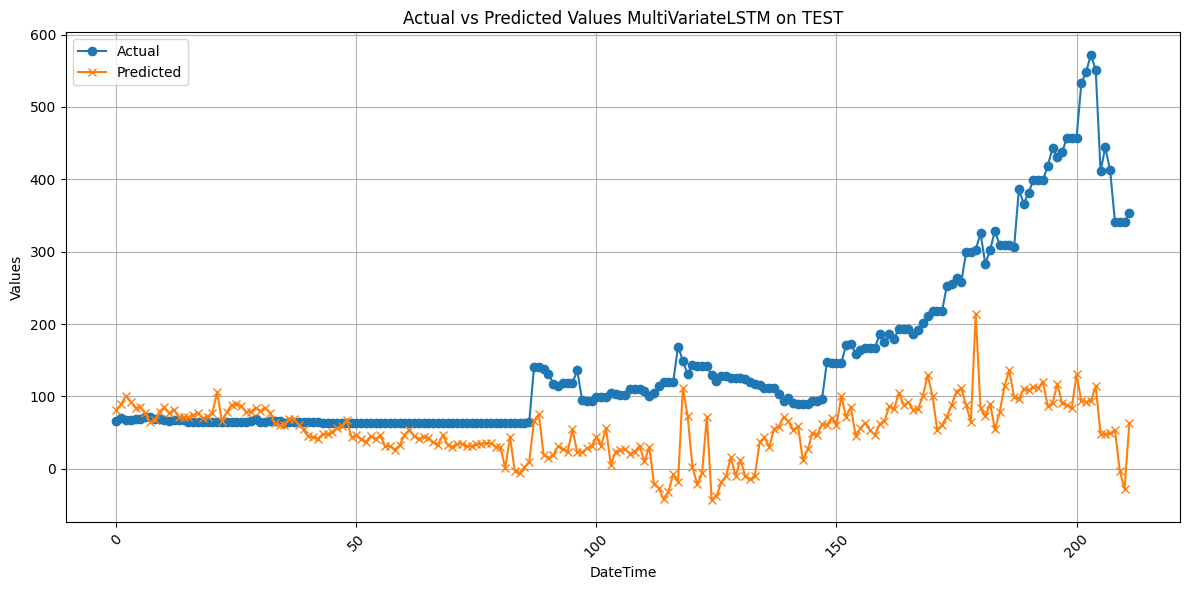

In [54]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

y_pred = y_pred.flatten()
predictions_df = pd.DataFrame(y_pred, index=datetime_index, columns=['Predicted'])
y_test_df = pd.DataFrame(y_test, index=datetime_index, columns=['Actual'])
predictions_df = predictions_df.sort_index()
y_test_df = y_test_df.sort_index()

# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(predictions_df.index, y_test_df['Actual'], label='Actual', marker='o')
plt.plot(y_test_df.index, predictions_df['Predicted'], label='Predicted', marker='x')
plt.title('Actual vs Predicted Values MultiVariateLSTM on TEST')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [55]:
import tensorflow as tf

# Define a function to compute gradients
def compute_gradients(input_data, model, target_index=0):
    input_tensor = tf.convert_to_tensor(input_data)
    with tf.GradientTape() as tape:
        tape.watch(input_tensor)
        predictions = model(input_tensor)
        target = predictions[:, target_index]  # Target the specific output
    gradients = tape.gradient(target, input_tensor)
    return gradients.numpy()

# Compute gradients for your test data
grads = compute_gradients(x_val, best_model)


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input [[ 2.0181432e+00  4.4721360e+00  9.9999997e-06 ... -1.4986655e+00
  -1.0647491e+00 -1.5626354e+00]
 [ 2.0239151e+00  4.4721360e+00  9.9999997e-06 ... -1.4986655e+00
  -1.0647491e+00 -1.5626354e+00]
 [ 1.6702237e+00 -2.0864956e-01  9.9999997e-06 ... -1.5254381e+00
  -1.4148619e+00 -1.4838009e+00]
 ...
 [-1.6542852e+00 -2.0864956e-01  9.9999997e-06 ...  5.5458480e-01
   2.3622344e-01  3.0686608e-01]
 [-3.7905368e-01 -2.0864956e-01  9.9999997e-06 ...  5.5458480e-01
   2.3622344e-01  3.0686608e-01]
 [-7.7664310e-01 -2.0864956e-01  9.9999997e-06 ...  5.5458480e-01
   2.3622344e-01  3.0686608e-01]]. Expected shape (None, 1, 42), but input has incompatible shape (42, 42)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(42, 42), dtype=float32)
  • training=None
  • mask=None

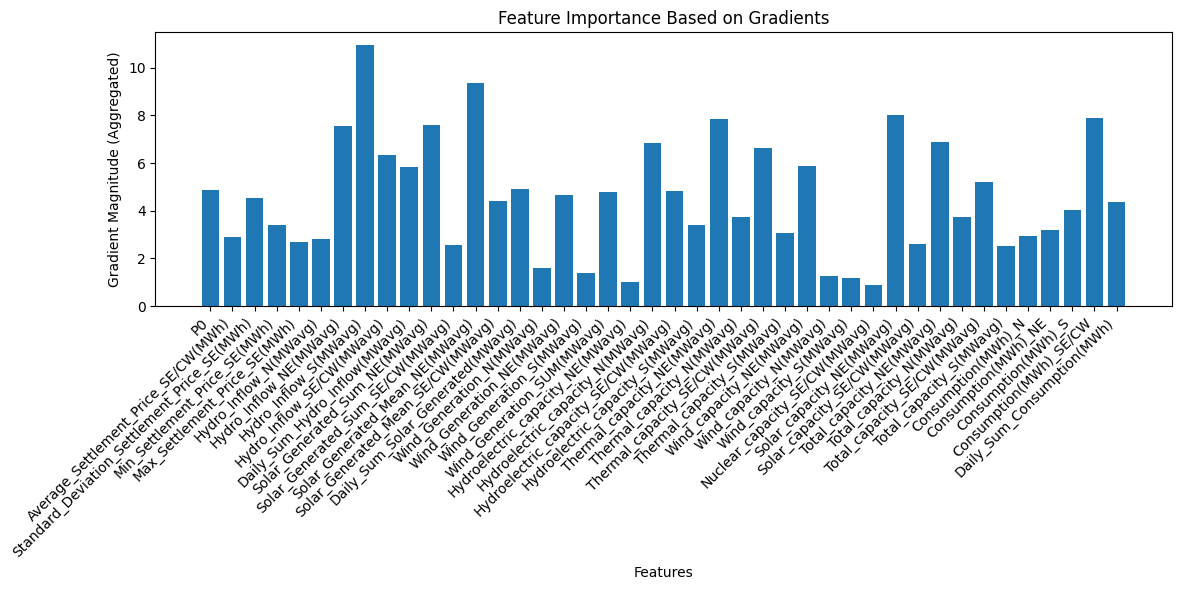

In [56]:
# Assuming `feature_names` is a list of column names corresponding to your features
# Example: feature_names = ["Feature1", "Feature2", ..., "FeatureN"]
feature_importance = np.sum(np.abs(grads), axis=1).mean(axis=0)  # Shape: (features,)

# Bar plot for feature importance with feature names
plt.figure(figsize=(12, 6))
plt.bar(feature_names, feature_importance)
plt.xlabel('Features')
plt.ylabel('Gradient Magnitude (Aggregated)')
plt.title('Feature Importance Based on Gradients')
plt.xticks(rotation=45, ha='right')  # Rotate feature names for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
